# **Importing All The Necessary Library Functions**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-dataset/diabetes_data.csv
/kaggle/input/health-dataset/hypertension_data.csv
/kaggle/input/health-dataset/stroke_data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
df=pd.read_csv('/kaggle/input/health-dataset/diabetes_data.csv')
pd.set_option('display.max_columns',30)
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']

Presenting the countplots for categorical features
------------------------------Age------------------------------


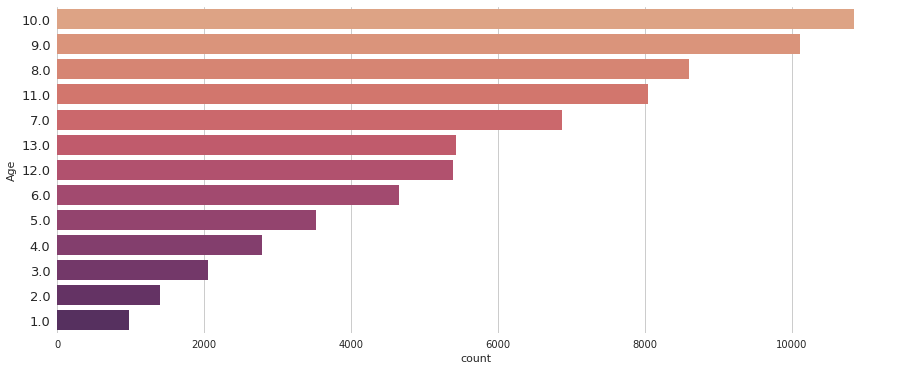

------------------------------Sex------------------------------


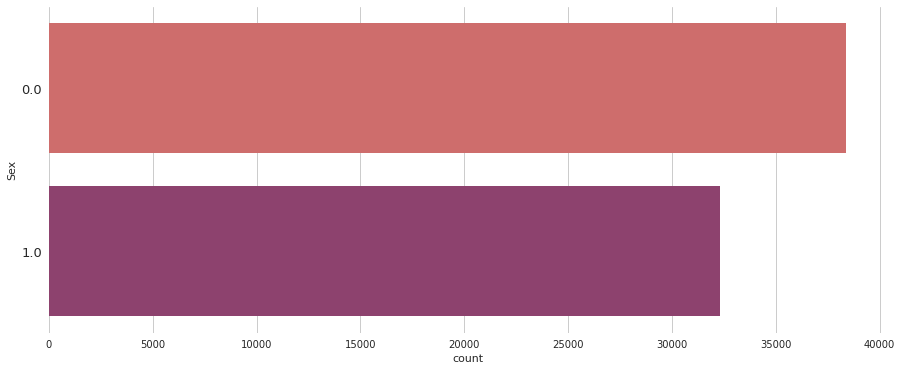

------------------------------HighChol------------------------------


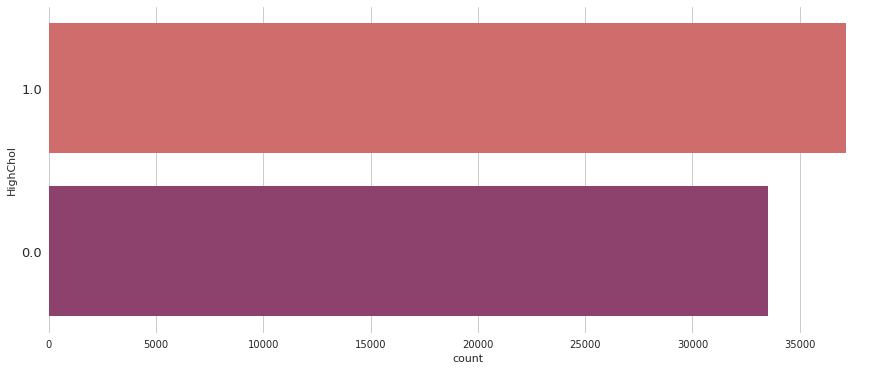

------------------------------CholCheck------------------------------


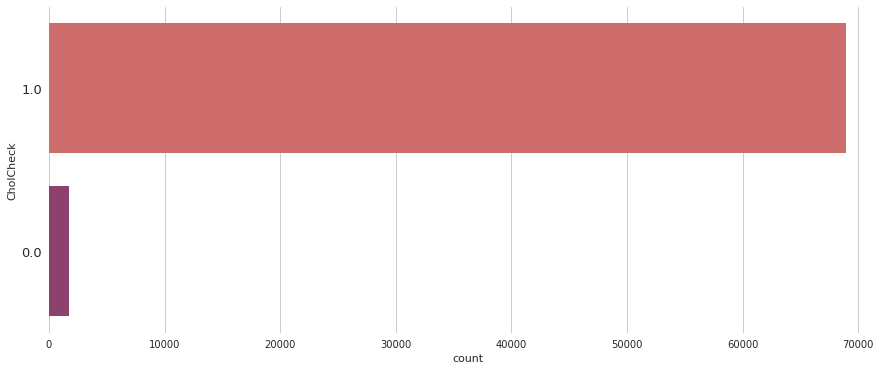

------------------------------Smoker------------------------------


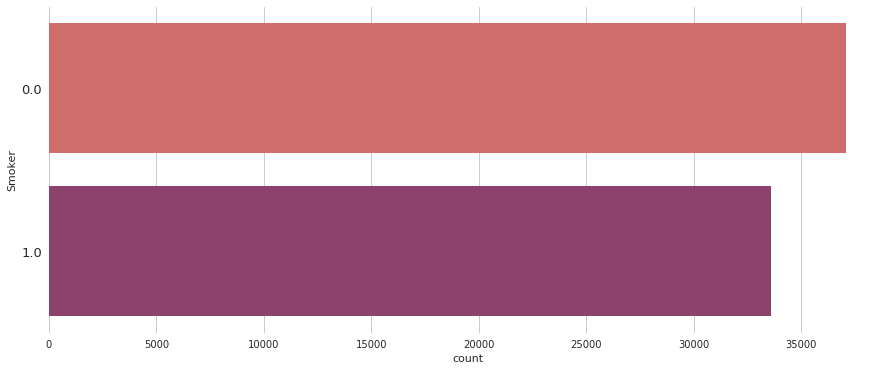

------------------------------HeartDiseaseorAttack------------------------------


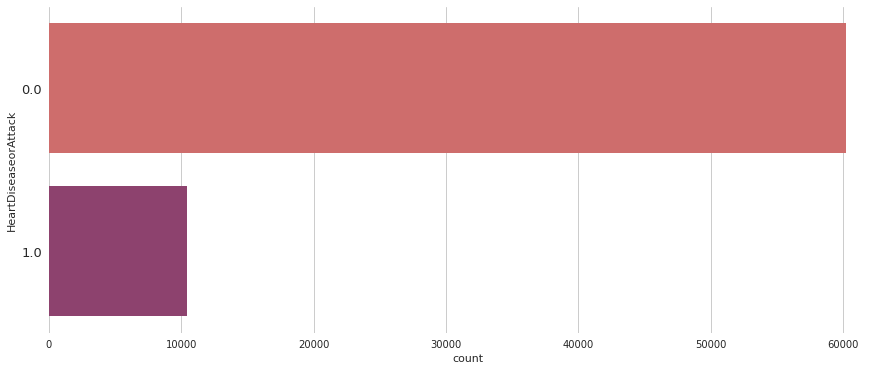

------------------------------PhysActivity------------------------------


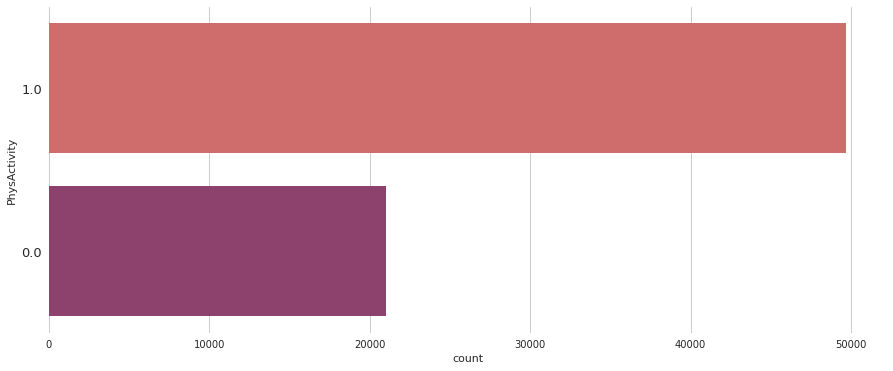

------------------------------Fruits------------------------------


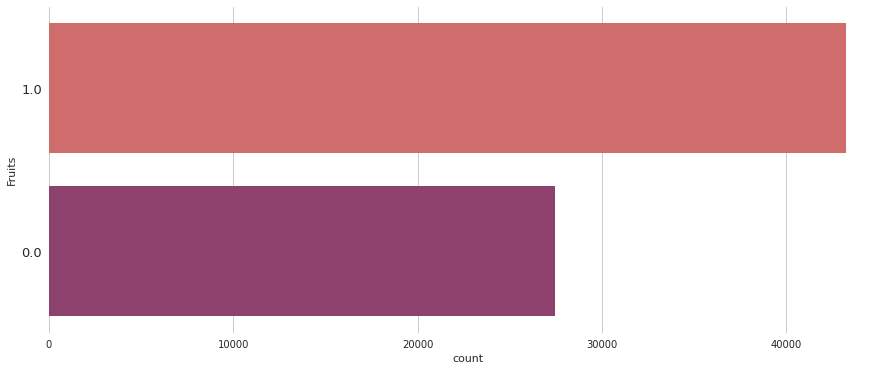

------------------------------Veggies------------------------------


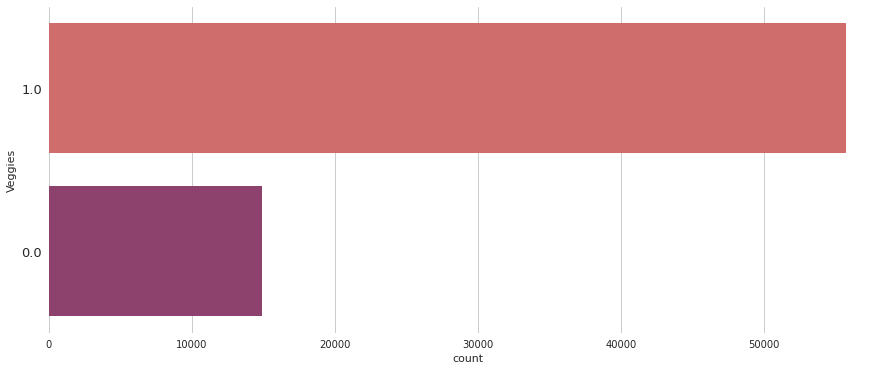

------------------------------HvyAlcoholConsump------------------------------


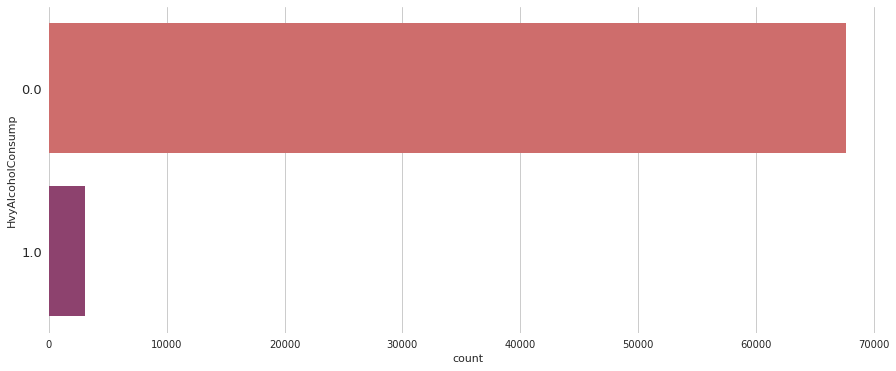

------------------------------GenHlth------------------------------


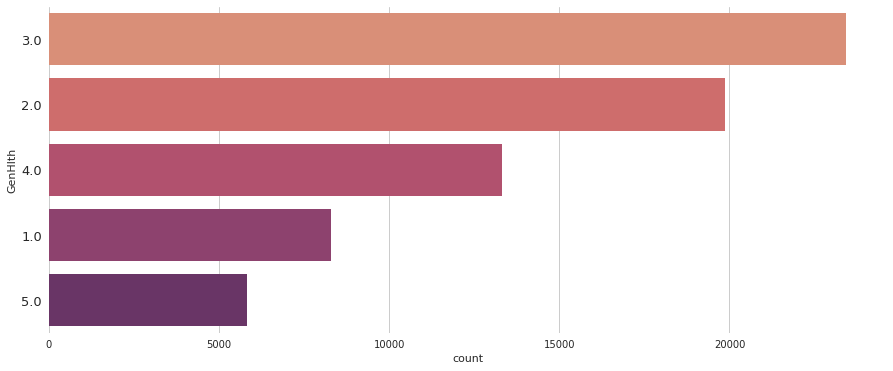

------------------------------DiffWalk------------------------------


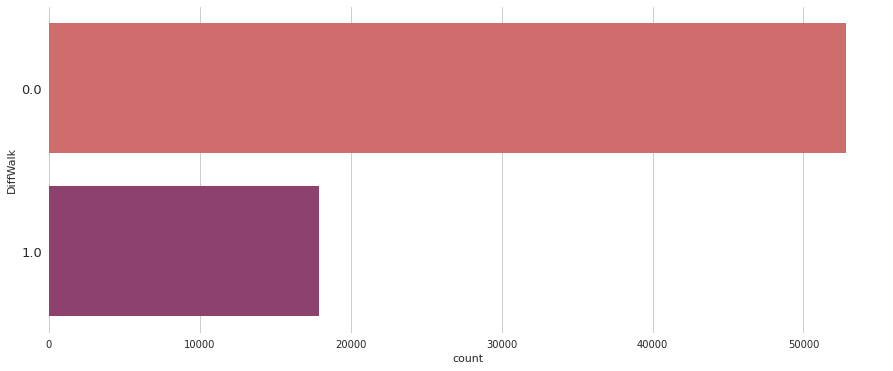

------------------------------Diabetes------------------------------


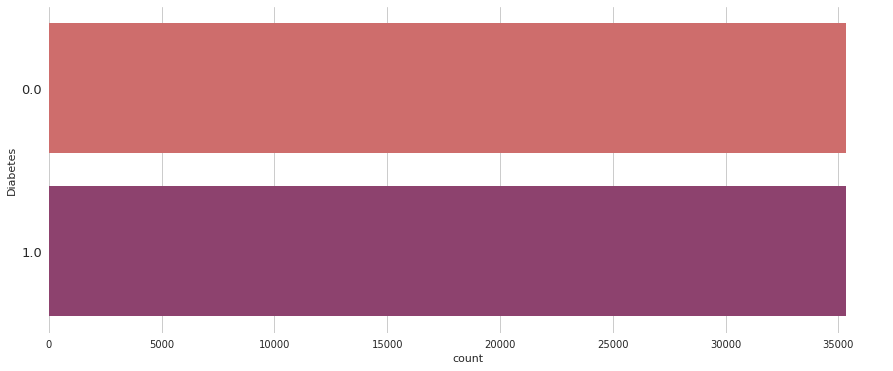

------------------------------HighBP------------------------------


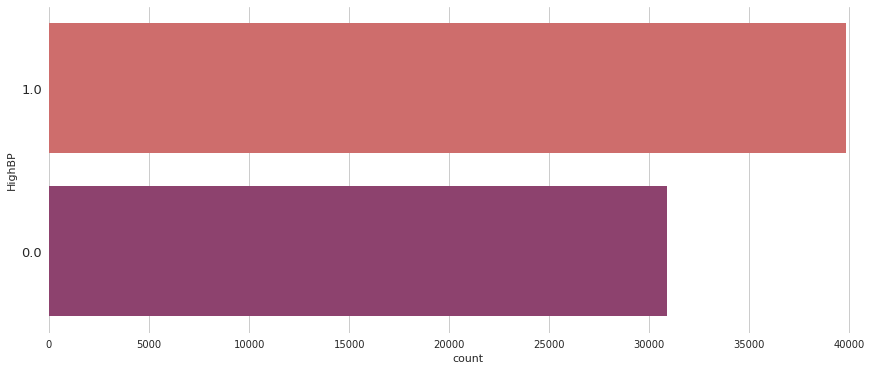

------------------------------Stroke------------------------------


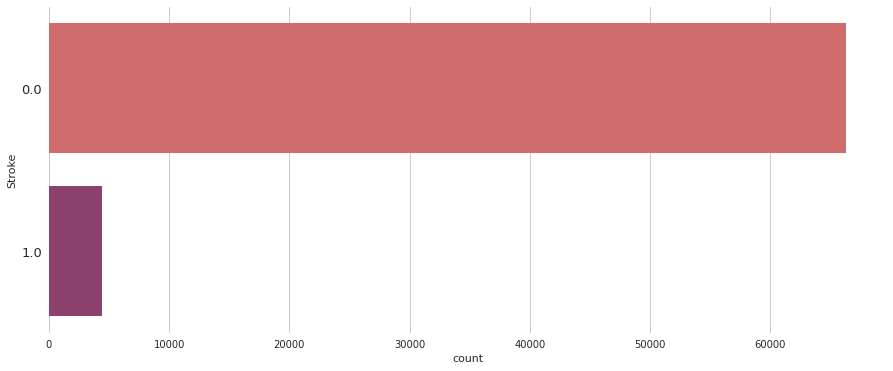

In [ ]:
print("Presenting the countplots for categorical features")
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='flare')
  plt.ylabel(i)
  plt.yticks(fontsize=13)
  print(f'------------------------------{i}------------------------------')
  plt.box(False)
  plt.show()

<AxesSubplot:>

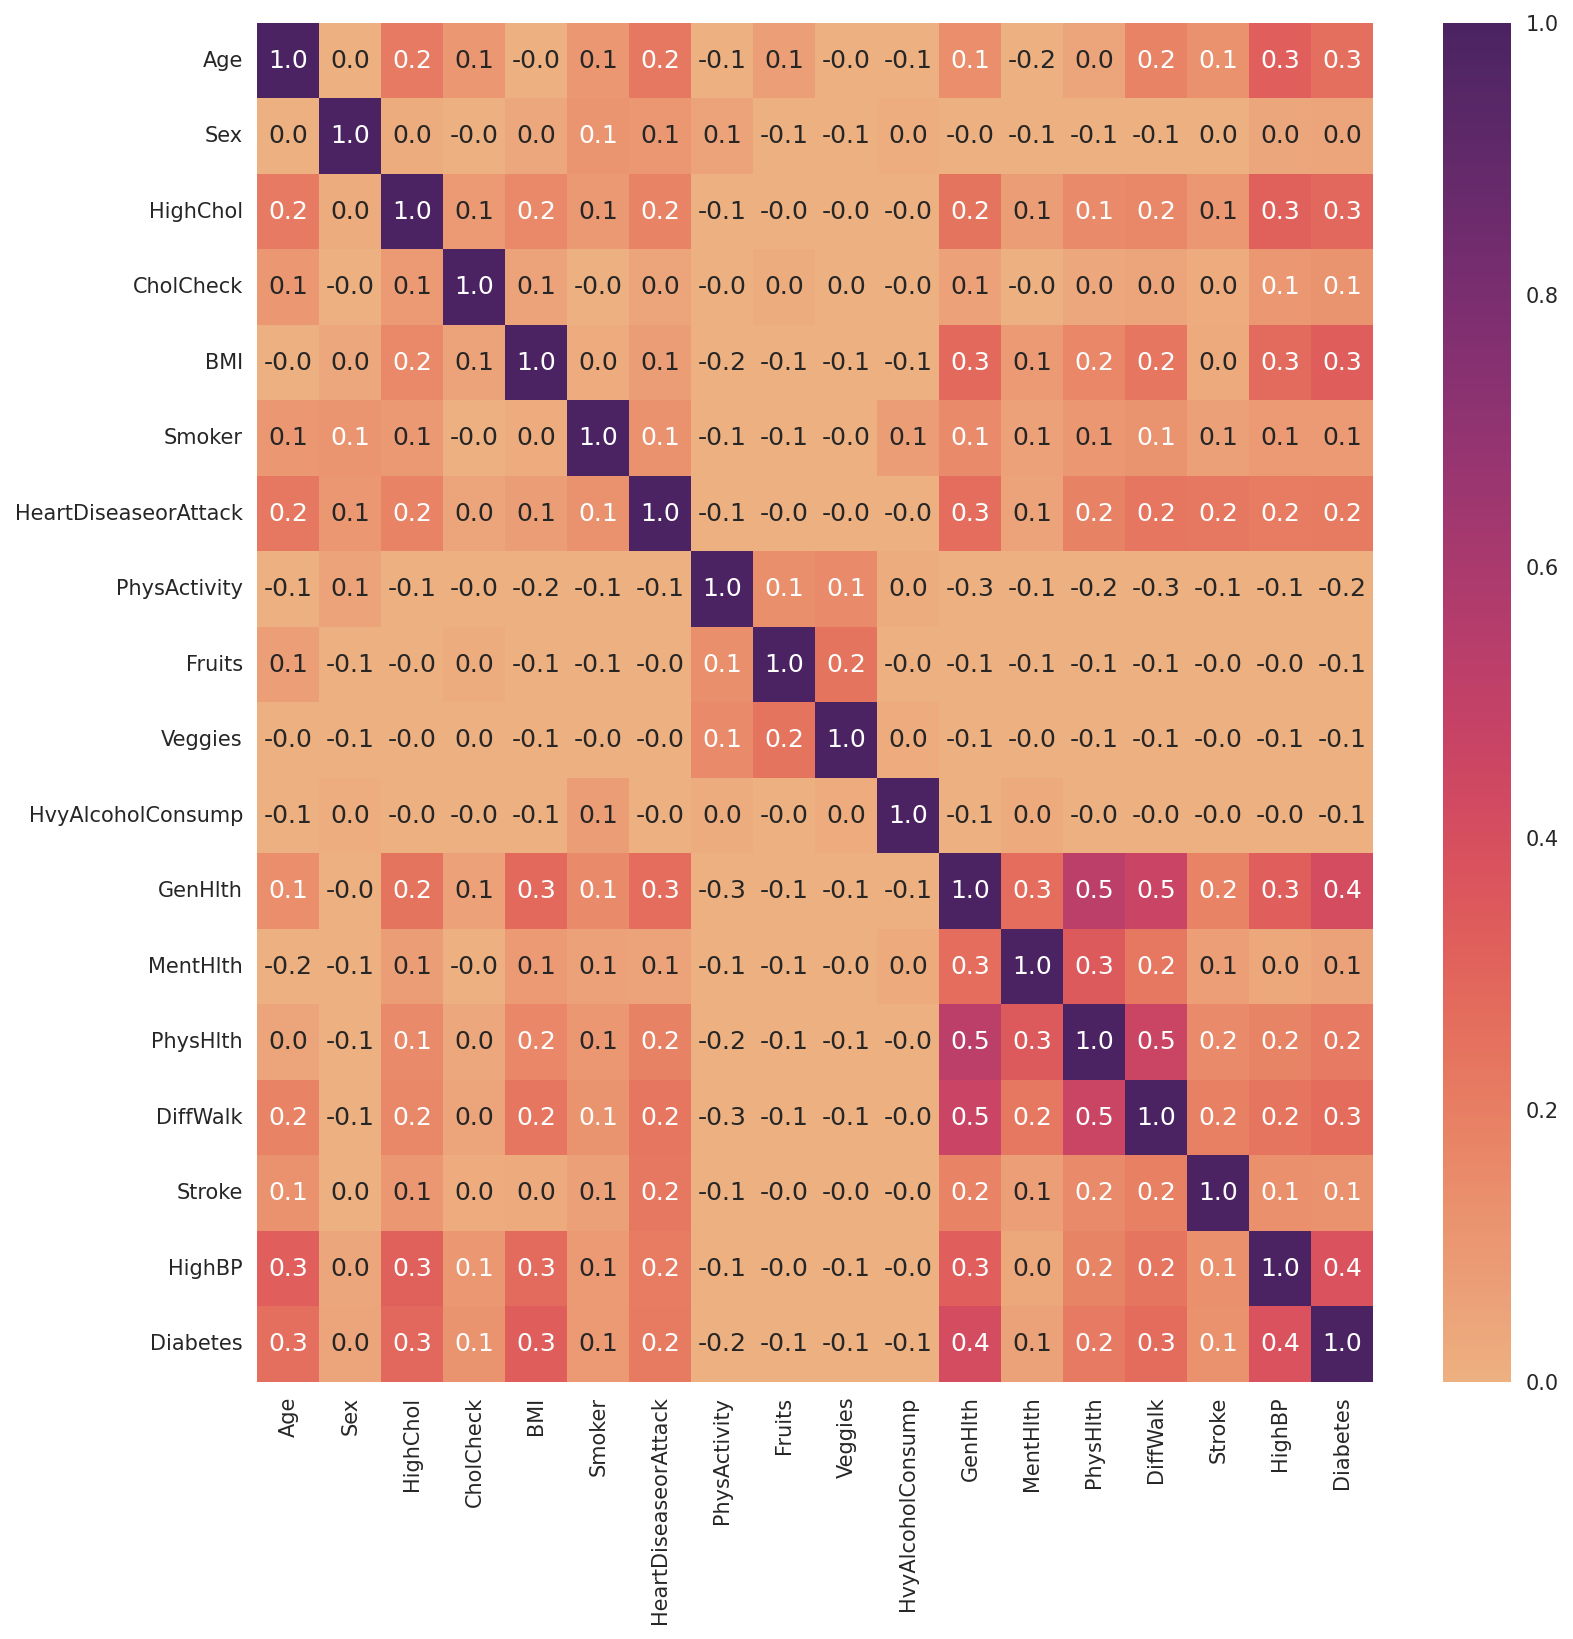

In [ ]:
plt.figure(figsize=(12,12),dpi=150)
sns.heatmap(df.corr(method='spearman'),vmin=0,fmt='.1f',annot=True,cmap='flare')

# **Dropping Features that are not required**

In [ ]:
data=df.drop(['Sex','CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','MentHlth'],axis=1)
data.head()

,Age,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,1.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,1.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


# **Stroke**

# **Splitting the data into input data features and target**

In [ ]:
X=data.drop('Stroke',axis=1)
y=data['Stroke']

# **Train-Test-Split and Scaling**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


# **Scaling the data so that comparatively larger values do not make the model biased**

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [ ]:
accuracy_list = {'Stroke':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0},
                 'Diabetes':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0},
                 'Hypertension':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0}}

# **Defining a function to standardize the model testing process**

In [ ]:
def model_train_test(name,model_name,model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)

    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='flare')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix ')
    plt.show()
    report = round(metrics.accuracy_score(y_test,y_pred)*100)
    accuracy_list[name][model_name] = report
    print("Accuracy of the model: {:.2f} %".format(report))
    print("\n\n\n\n")
    print('ROC-AUC\n')
    visualizer = ROCAUC(model, classes=["No", "Yes"])

    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()




In [ ]:
def plot_bar(name):
    keys = list(accuracy_list[name].keys())
    values = list(accuracy_list[name].values())
    fig = plt.figure(figsize =(10, 7))
    plt.bar(keys, values, color =['#132A13','#31572C','#4F772D','#90A955','#90A955'],width = 0.4)
    plt.show()

# **Testing Different Models**


**LOGISTIC REGRESSION**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.33      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.64      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



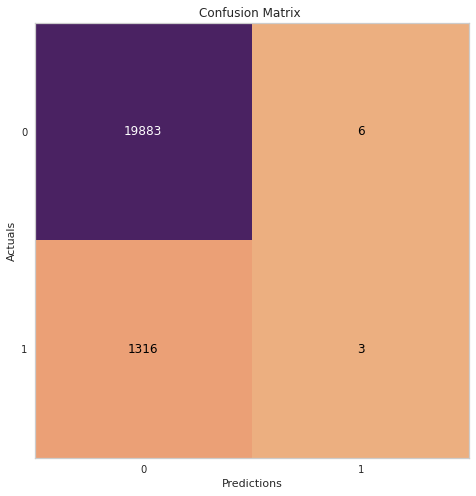

Accuracy of the model: 94.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


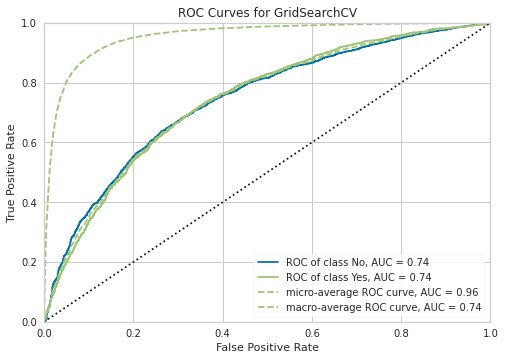

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test('Stroke','Logistic Regression',logreg_cv)

**GAUSSIAN NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     19889
         1.0       0.20      0.48      0.28      1319

    accuracy                           0.85     21208
   macro avg       0.58      0.68      0.60     21208
weighted avg       0.91      0.85      0.88     21208



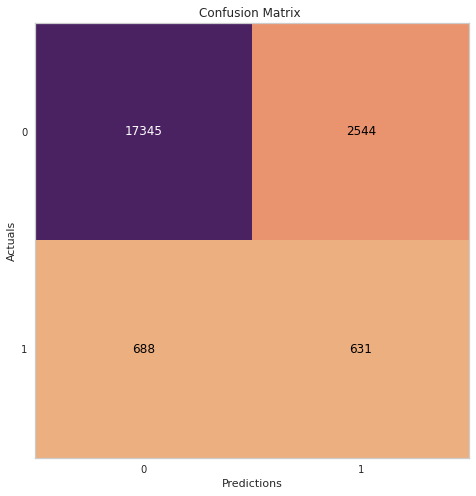

Accuracy of the model: 85.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


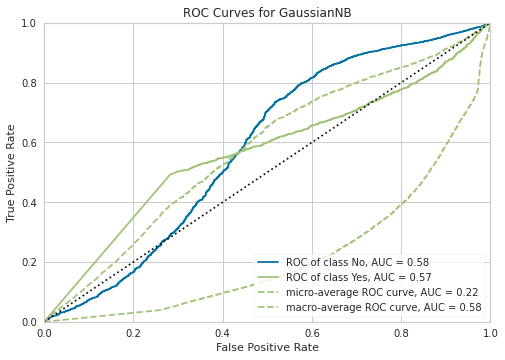

In [ ]:
gnb=GaussianNB()
model_train_test('Stroke','Gaussian Naive Bayes',gnb)

**BERNOULLI NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     19889
         1.0       0.22      0.31      0.26      1319

    accuracy                           0.89     21208
   macro avg       0.59      0.62      0.60     21208
weighted avg       0.91      0.89      0.90     21208



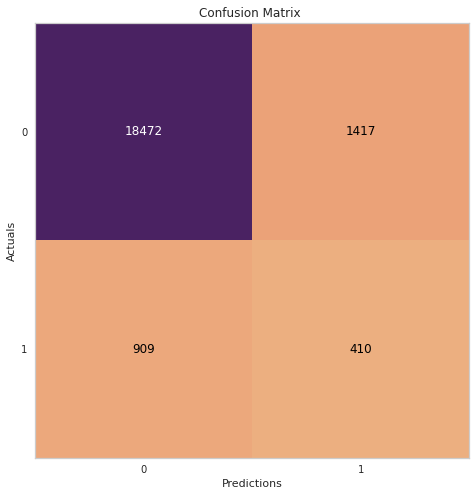

Accuracy of the model: 89.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


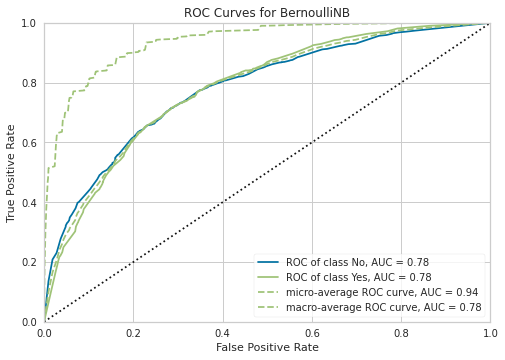

In [ ]:
bnb=BernoulliNB()
model_train_test('Stroke','Bernoulli Naive Bayes',bnb)

**K-NEAREST NEIGHBOURS**

In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 18}
Accuracy for our training dataset with tuning is : 93.74%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.32      0.01      0.01      1319

    accuracy                           0.94     21208
   macro avg       0.63      0.50      0.49     21208
weighted avg       0.90      0.94      0.91     21208



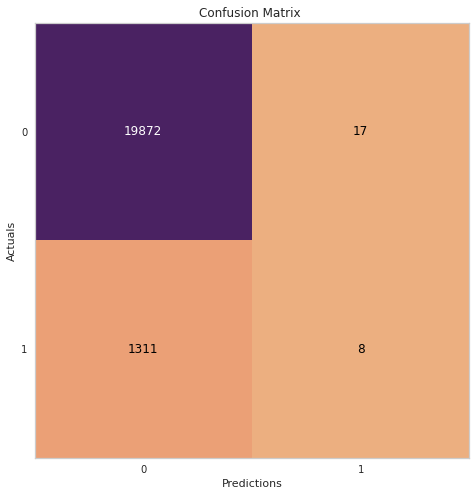

Accuracy of the model: 94.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


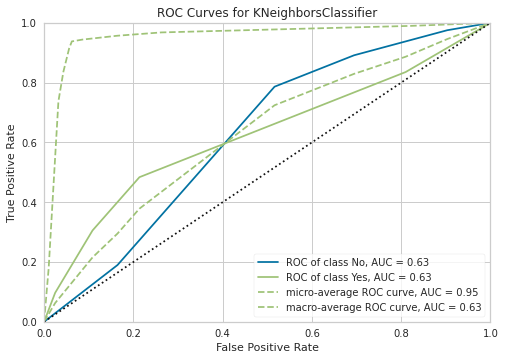

In [ ]:
model_train_test('Stroke','KNN',KNeighborsClassifier(n_neighbors=18))

**DECISION TREE**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Accuracy for our training dataset with tuning is : 93.78%


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     19889
         1.0       0.00      0.00      0.00      1319

    accuracy                           0.94     21208
   macro avg       0.47      0.50      0.48     21208
weighted avg       0.88      0.94      0.91     21208



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


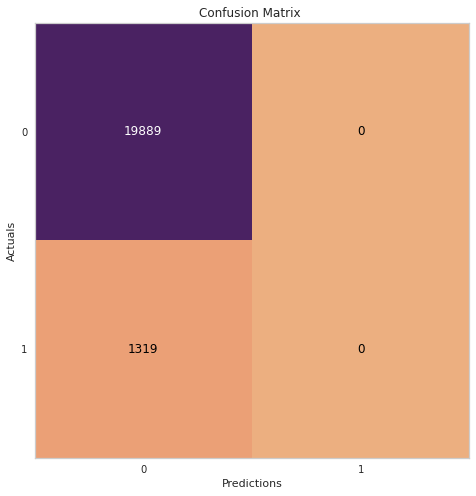

Accuracy of the model: 94.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


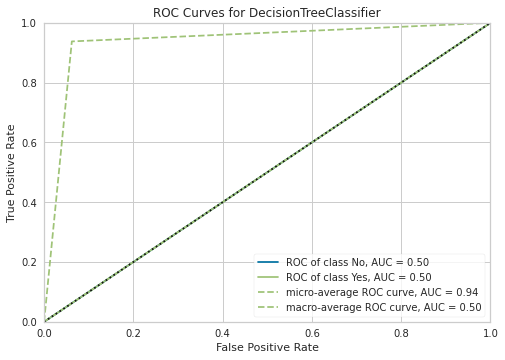

In [ ]:
model_train_test('Stroke','Decision Tree',DecisionTreeClassifier(ccp_alpha=0.1,criterion='gini',max_depth=5,max_features='auto'))

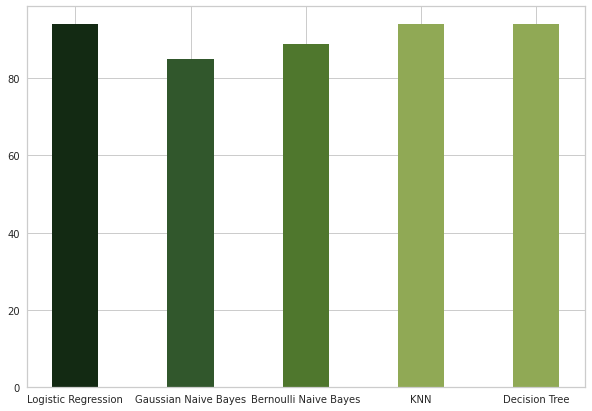

In [ ]:
plot_bar('Stroke')

# **HyperTension**

In [ ]:
X=data.drop('HighBP',axis=1)
y=data['HighBP']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(49484, 10)
(21208, 10)


# **Scaling the data so that comparatively larger values do not make the model biased**

In [ ]:

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

# **Testing Different Models**

 **LOGISTIC REGRESSION**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69      9258
         1.0       0.75      0.81      0.78     11950

    accuracy                           0.74     21208
   macro avg       0.74      0.73      0.73     21208
weighted avg       0.74      0.74      0.74     21208



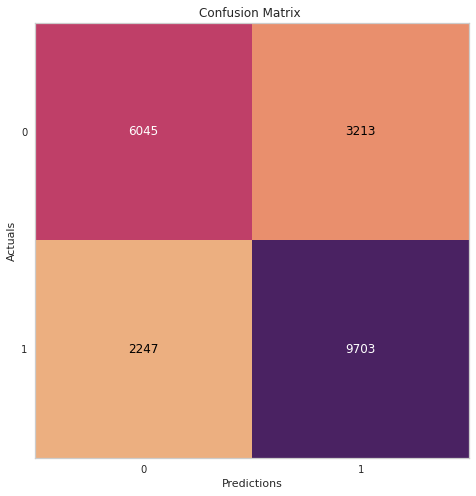

Accuracy of the model: 74.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


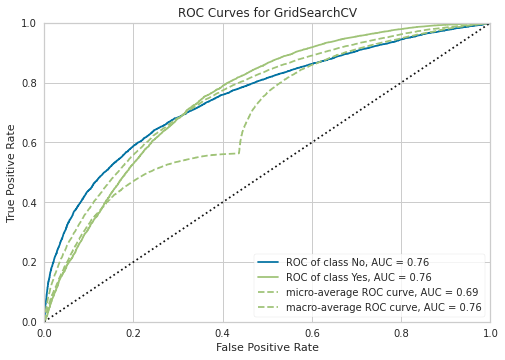

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test('Hypertension','Logistic Regression',logreg_cv)

**GAUSSIAN NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68      9258
         1.0       0.78      0.61      0.69     11950

    accuracy                           0.69     21208
   macro avg       0.70      0.70      0.69     21208
weighted avg       0.71      0.69      0.69     21208



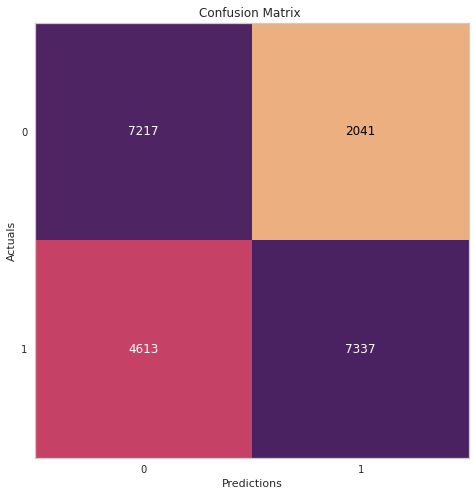

Accuracy of the model: 69.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


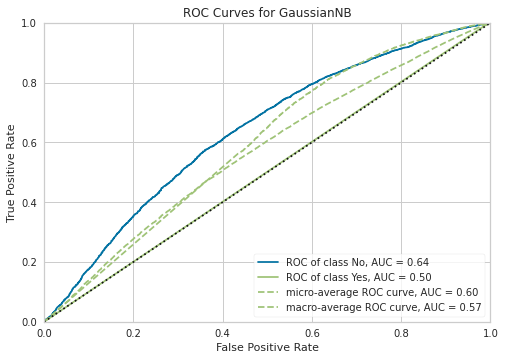

In [ ]:
gnb=GaussianNB()
model_train_test('Hypertension','Gaussian Naive Bayes',gnb)

**BERNOULLI NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69      9258
         1.0       0.76      0.74      0.75     11950

    accuracy                           0.73     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.73      0.73      0.73     21208



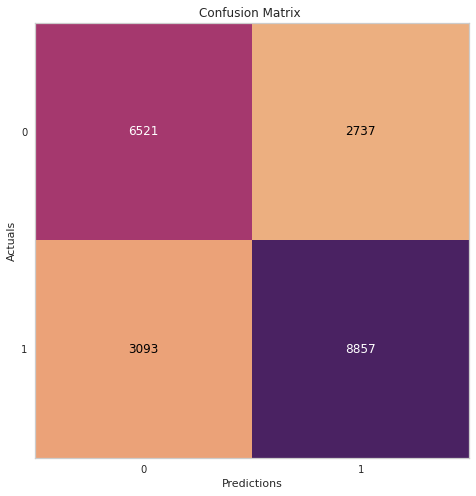

Accuracy of the model: 73.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


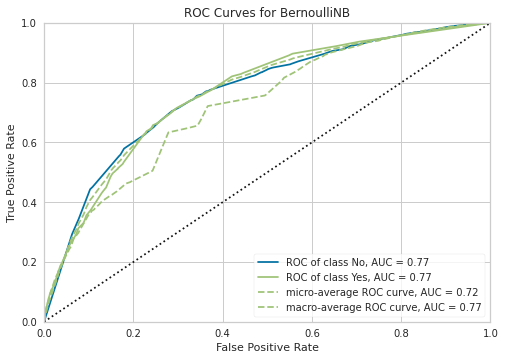

In [ ]:
bnb=BernoulliNB()
model_train_test('Hypertension','Bernoulli Naive Bayes',bnb)

**K-NEAREST NEIGHBOURS**

In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 19}
Accuracy for our training dataset with tuning is : 73.49%


              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67      9258
         1.0       0.74      0.81      0.77     11950

    accuracy                           0.73     21208
   macro avg       0.73      0.72      0.72     21208
weighted avg       0.73      0.73      0.73     21208



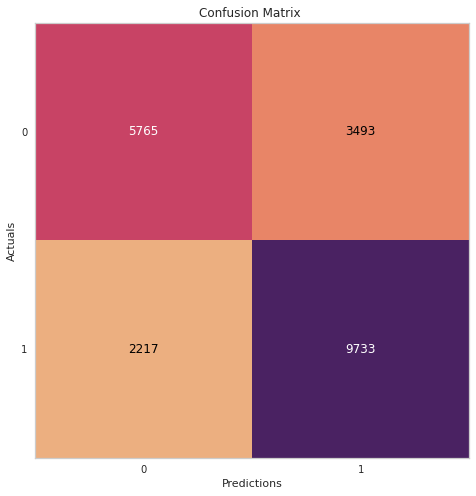

Accuracy of the model: 73.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


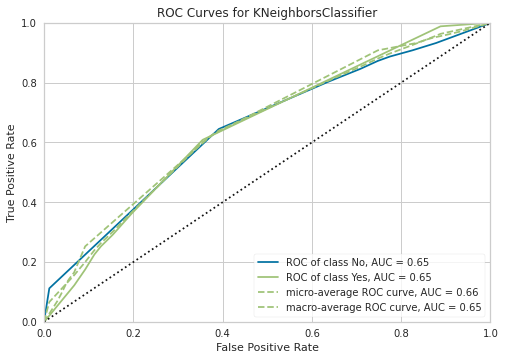

In [ ]:
model_train_test('Hypertension','KNN',KNeighborsClassifier(n_neighbors=19))

**DECISION TREE**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}
Accuracy for our training dataset with tuning is : 72.60%


              precision    recall  f1-score   support

         0.0       0.74      0.56      0.64      9258
         1.0       0.71      0.85      0.78     11950

    accuracy                           0.72     21208
   macro avg       0.73      0.71      0.71     21208
weighted avg       0.73      0.72      0.72     21208



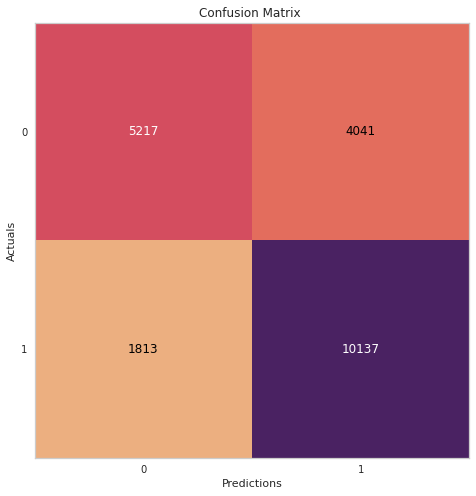

Accuracy of the model: 72.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


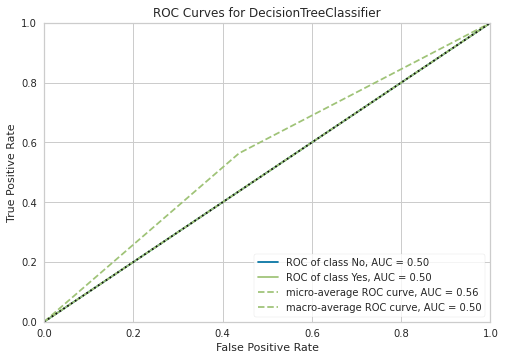

In [ ]:
model_train_test('Hypertension','Decision Tree',DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy',max_depth=8,max_features='log2'))

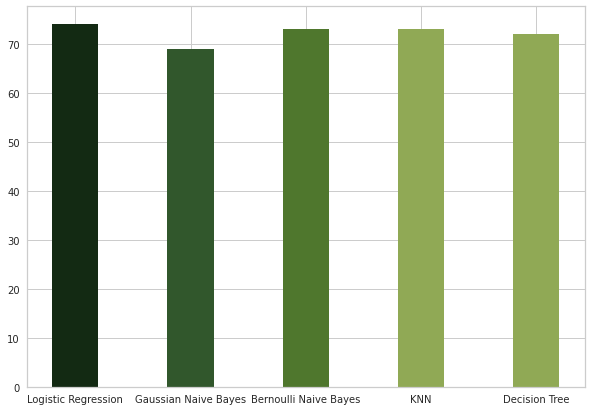

In [ ]:
plot_bar('Hypertension')

# **Diabetes**


# **Splitting the data into input data features and target**

In [ ]:
X=data.drop('Diabetes',axis=1)
y=data['Diabetes']

# **Train-Test-Split and Scaling**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=105,stratify=y)

# **Scaling the data so that comparatively larger values do not make the model biased**

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

# **Testing Different Models**

**LOGISTIC REGRESSION**

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     10604
         1.0       0.74      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



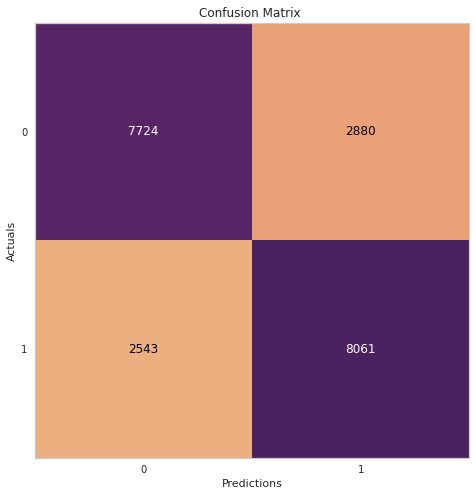

Accuracy of the model: 74.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


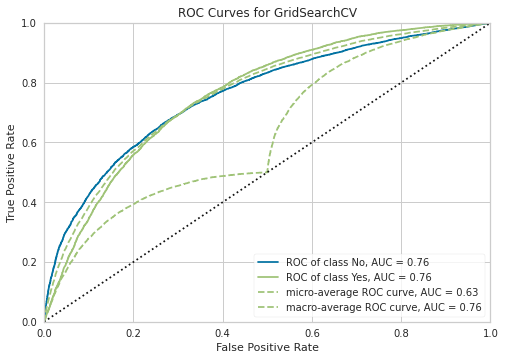

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
model_train_test('Diabetes','Logistic Regression',logreg_cv)

**GAUSSIAN NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72     10604
         1.0       0.74      0.61      0.67     10604

    accuracy                           0.70     21208
   macro avg       0.70      0.70      0.69     21208
weighted avg       0.70      0.70      0.69     21208



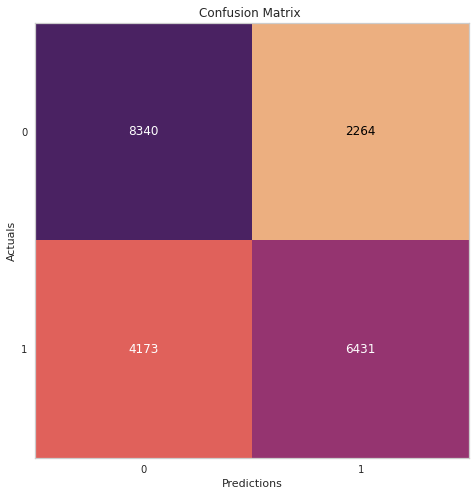

Accuracy of the model: 70.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


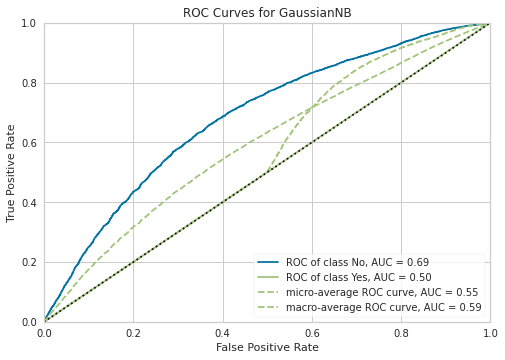

In [ ]:
gnb=GaussianNB()
model_train_test('Diabetes','Gaussian Naive Bayes',gnb)

**BERNOULLI NAIVE BAYES**

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73     10604
         1.0       0.73      0.73      0.73     10604

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



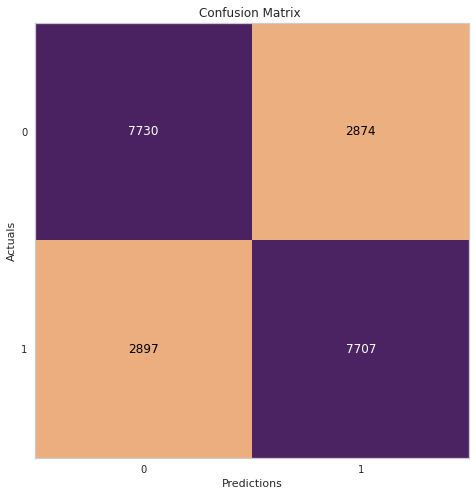

Accuracy of the model: 73.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


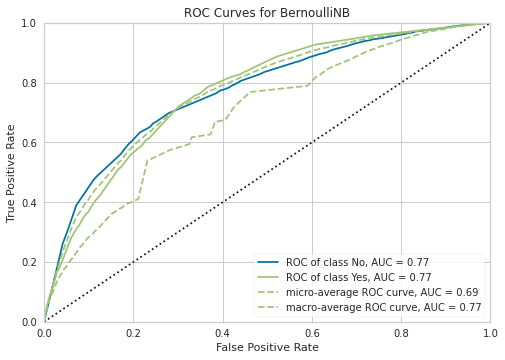

In [ ]:
bnb=BernoulliNB()
model_train_test('Diabetes','Bernoulli Naive Bayes',bnb)

**K-NEAREST NEIGHBOURS**

In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 19}
Accuracy for our training dataset with tuning is : 73.44%


              precision    recall  f1-score   support

         0.0       0.77      0.69      0.72     10604
         1.0       0.72      0.79      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



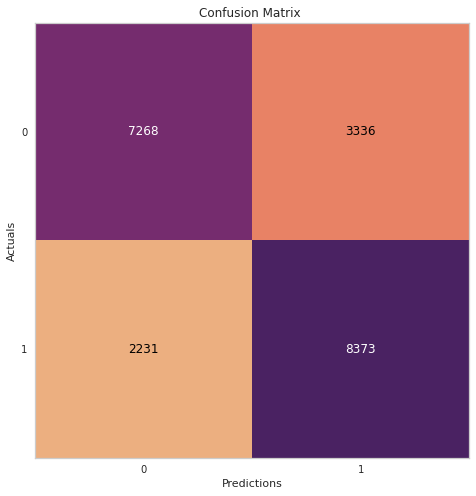

Accuracy of the model: 74.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


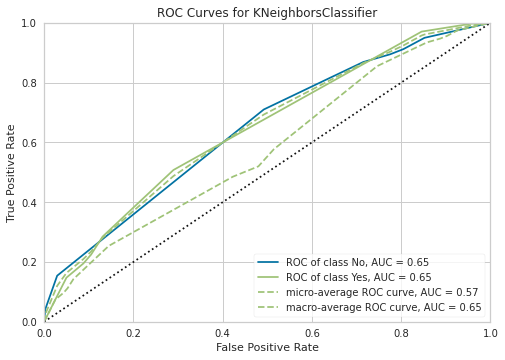

In [ ]:
model_train_test('Diabetes','KNN',KNeighborsClassifier(n_neighbors=19))

**DECISION TREE**

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 72.74%


              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71     10604
         1.0       0.70      0.80      0.75     10604

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



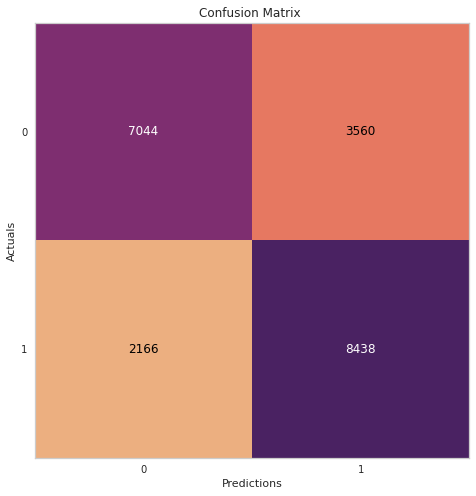

Accuracy of the model: 73.00 %





ROC-AUC



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


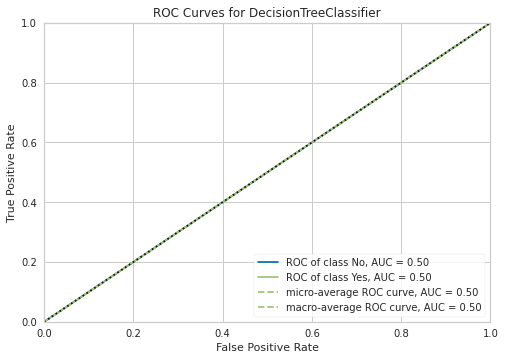

In [ ]:
model_train_test('Diabetes','Decision Tree',DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy',max_depth=9,max_features='auto'))

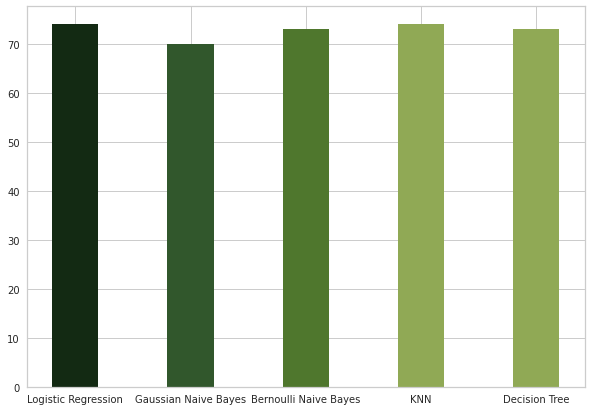

In [ ]:
plot_bar('Diabetes')